## Distribuciones

Seaborn ofrece algunas gráficas u opciones que te permiten trabajar con distribuciones orientadas a tipos de datos numéricos. Veamos como puedes lograrlo utilizando código.

- histplot: histograma
- kdeplot: diagrama de densidad
- ecdfplot: no le gusta mucho al instructor. 


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
print(type(tips))
tips.head()

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Mostremos un histograma sencillo, con 7 contenedores
- bins
- cumulative: frecuencia acumulada
- stat: frequency, probability, Count(by default), percent, density

¿Cual es la diferencia entre Count y frequency?

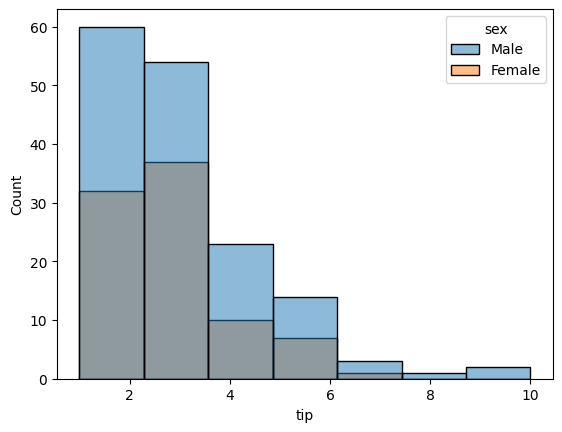

In [6]:
sns.histplot(data=tips, x='tip', hue='sex', bins=7);

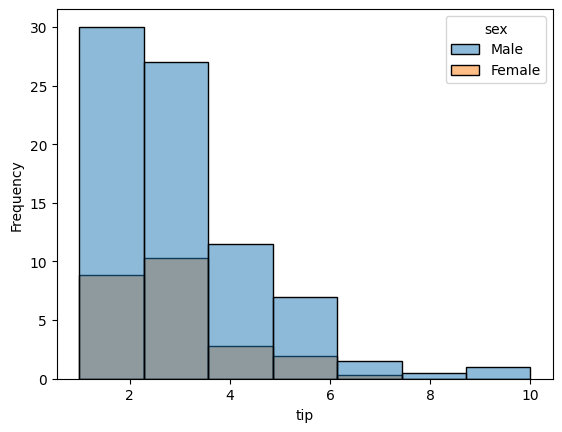

In [10]:
sns.histplot(data=tips, x='tip', hue='sex', bins=7, stat='frequency');

aplicando frecuencia acumulada

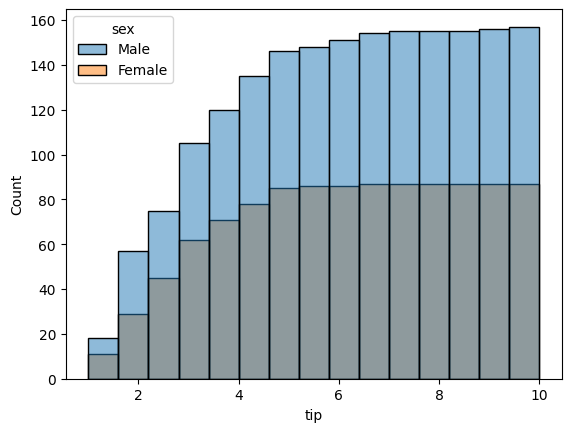

In [8]:
sns.histplot(data=tips, x='tip', hue='sex', bins=15, cumulative=True);

multiple: como quiere que se presente: 
-   stack: uno encima del otro
-   layer: por defecto creo
-   dodge: apartes
-   fill: de o a 1, muy usado

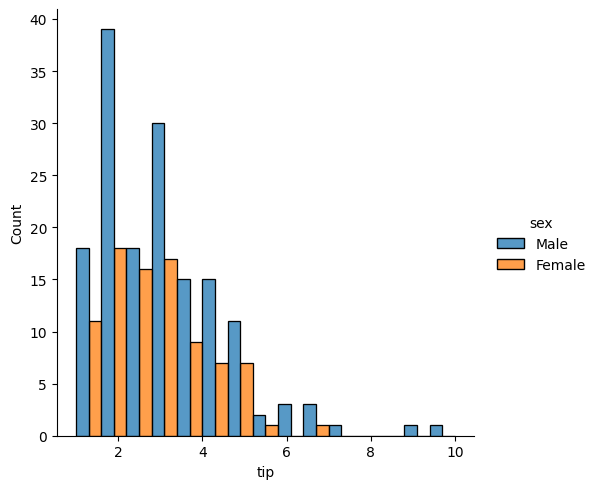

In [12]:
sns.displot(data=tips, x='tip', hue='sex', bins=15, multiple='dodge')

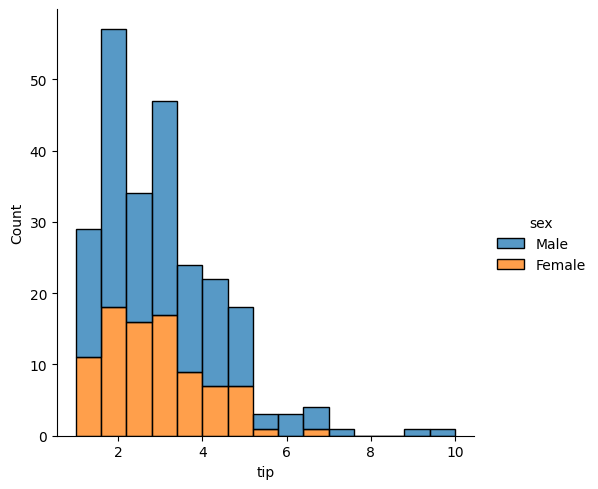

In [13]:
sns.displot(data=tips, x='tip', hue='sex', bins=15, multiple='stack')

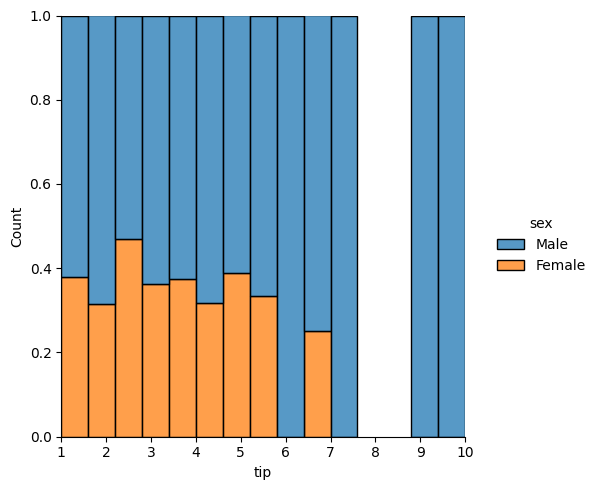

In [14]:
sns.displot(data=tips, x='tip', hue='sex', bins=15, multiple='fill')

### KDE plot

Grafico de densidad

-   cumulative
-   shade: rellena el area
-   bw_adjut

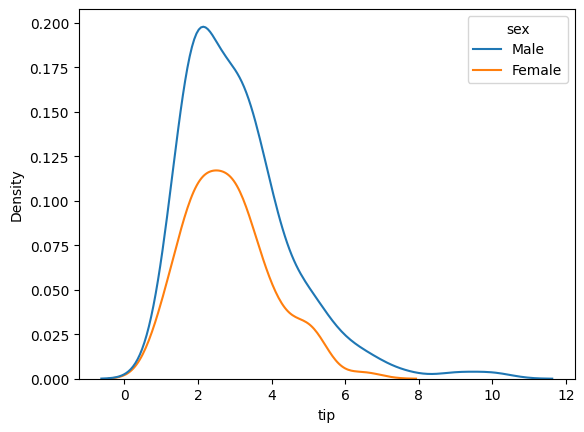

In [15]:
sns.kdeplot(data=tips, x='tip', hue='sex');

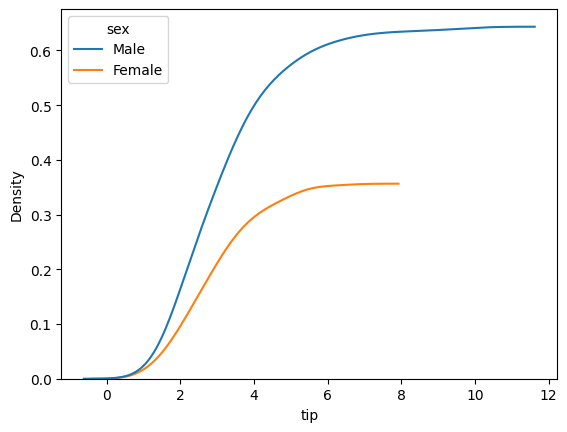

In [16]:
sns.kdeplot(data=tips, x='tip', hue='sex', cumulative=True);

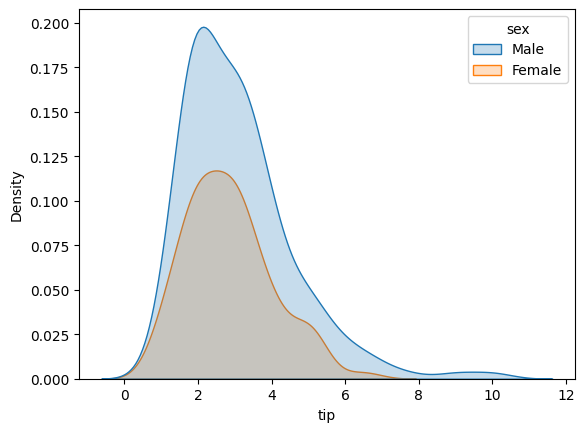

In [18]:
sns.kdeplot(data=tips, x='tip', hue='sex', cumulative=False, shade=True);

Ajustando el bw_adjust

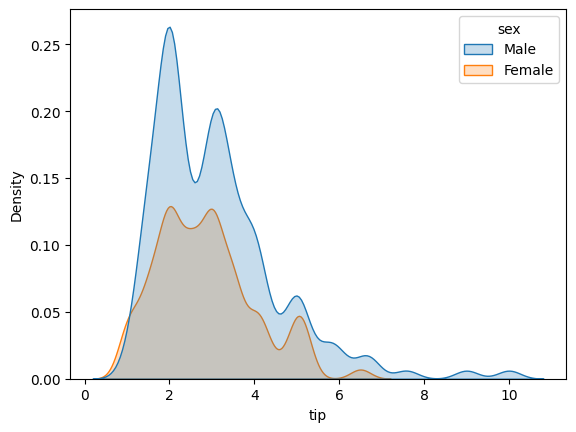

In [20]:
sns.kdeplot(data=tips, x='tip', hue='sex', cumulative=False, shade=True, bw_adjust=0.5);

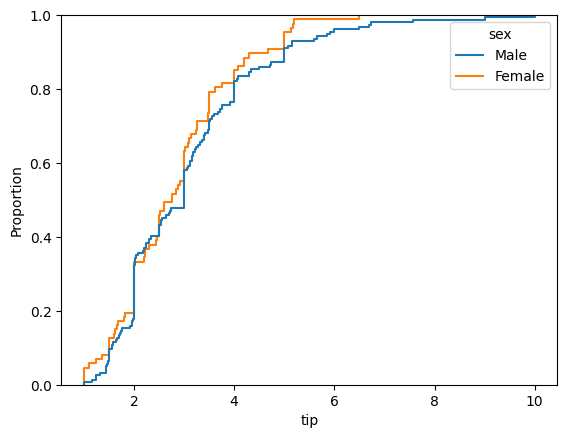

In [3]:
sns.ecdfplot(data=tips, x='tip', hue='sex');

Lo interesante de seaborn es que permite generar todos los tipos de graficos, simplemente modificando el parametro **kind**, sin importar el tipo de grafico

- kind: hist, kde, ecdf

Por ejemplo generando el kde, a partir del displot

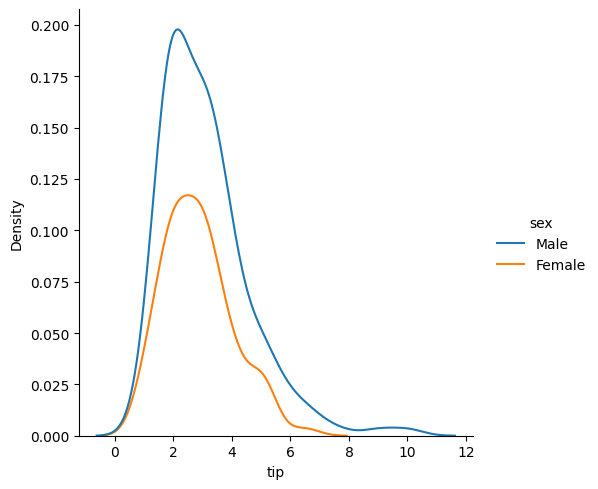

In [4]:
sns.displot(data=tips, x='tip', hue='sex', kind='kde');

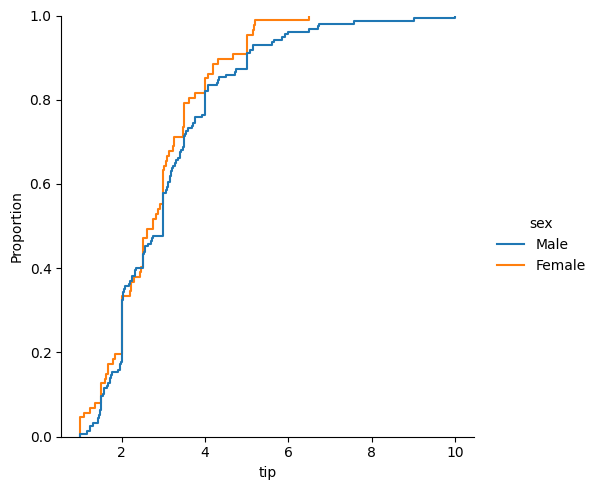

In [5]:
sns.displot(data=tips, x='tip', hue='sex', kind='ecdf');

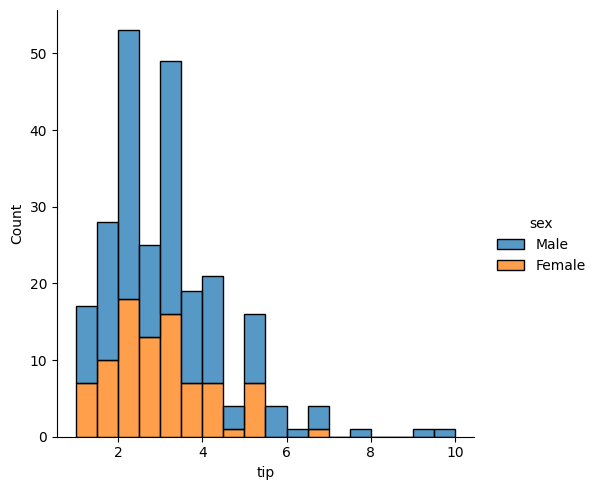

In [10]:
sns.displot(data=tips, x='tip', hue='sex', kind='hist', multiple='stack');

En conclusion, si solo quieres aprender a manejar un tipo de grafico que sea *displot* y de ahi generas los demas

## Variables Categoricas

Variables de texto, y seaborn nos ofrece varios tipos de graficas

- countplot
- stripplot
- swarmplot
- boxplot
- violinplot
- catplot: uno de los favoritos del profe

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

In [12]:
tips.shape

(244, 7)

En $x$ tomaremos una variable categorica como el dia

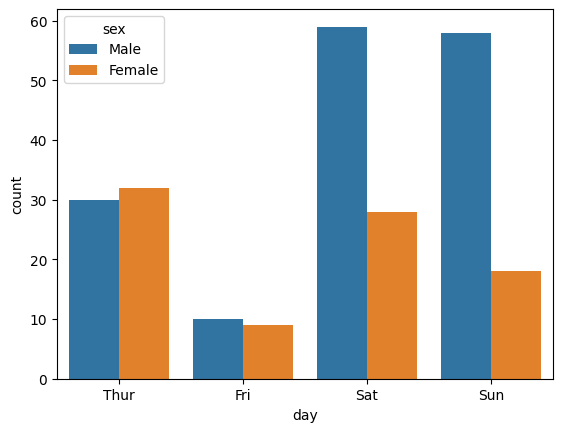

In [14]:
sns.countplot(data=tips, x='day', hue='sex');

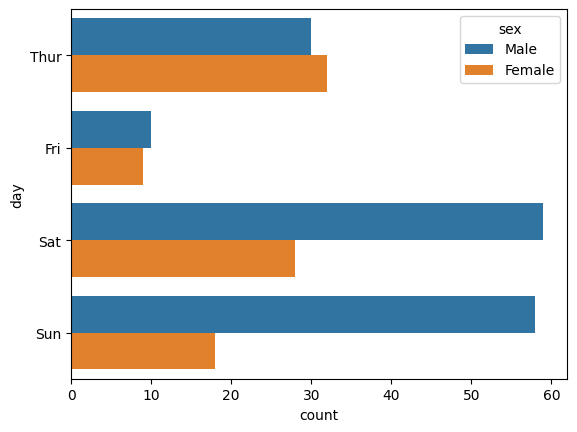

In [15]:
sns.countplot(data=tips, y='day', hue='sex');

### stripplot

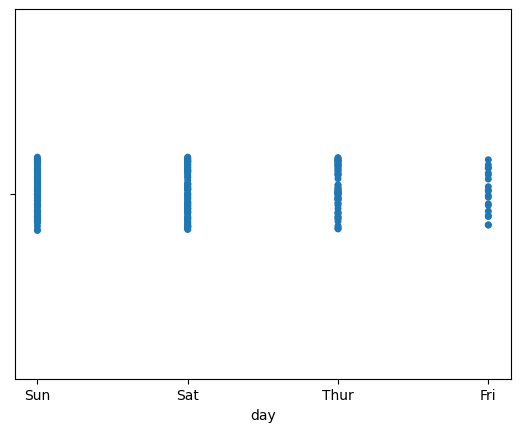

In [17]:
sns.stripplot(data=tips, x='day', hue='sex');

A simple vista, no da mucha informacion, pero si insistimos en darle mas contexto, tal vez podamos encontrarle una utilidad

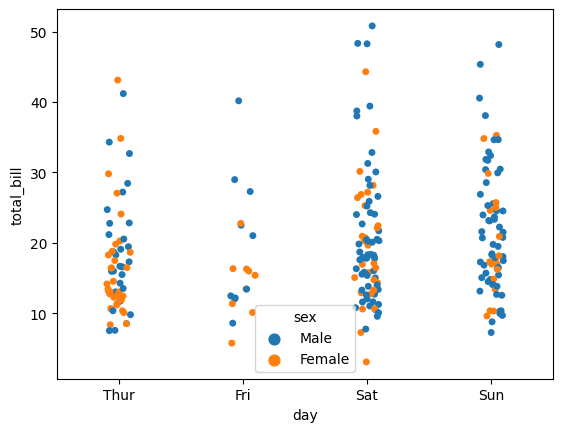

In [18]:
sns.stripplot(data=tips, x='day', y='total_bill', hue='sex');

Si hacemos *dodge* igual a True

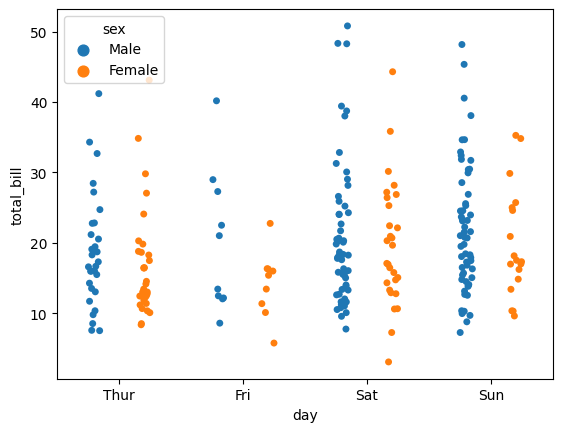

In [19]:
sns.stripplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');

Podemos manipular tambien parametros de matplotlib, por ejemplo, para agrandar la figura

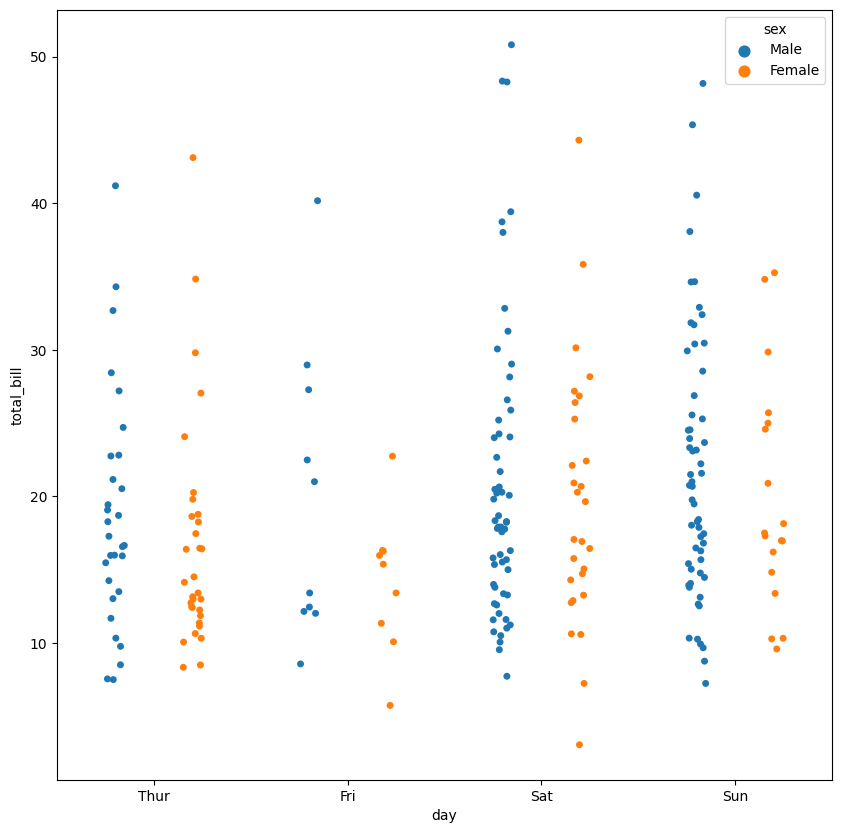

In [20]:
plt.figure(figsize=(10,10))
sns.stripplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');

### Swarmplot

Muy parecido a striplot, con la diferencia que habra una especie de eje horizontal donde mas se estan concentrando los datos. Una manera de encontrar *insights* en nuestros datos de manera visual

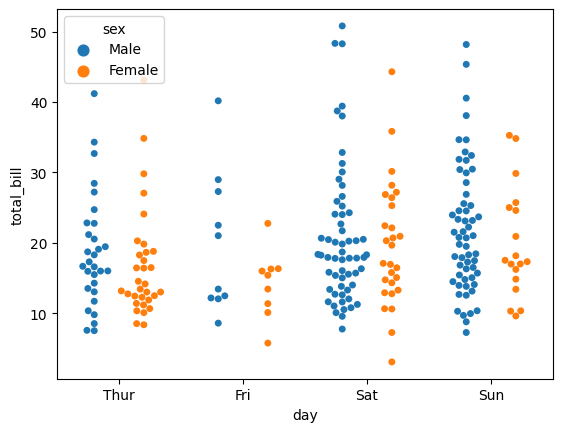

In [21]:
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');

### Boxplot

Distribucion estadistica por cuartiles

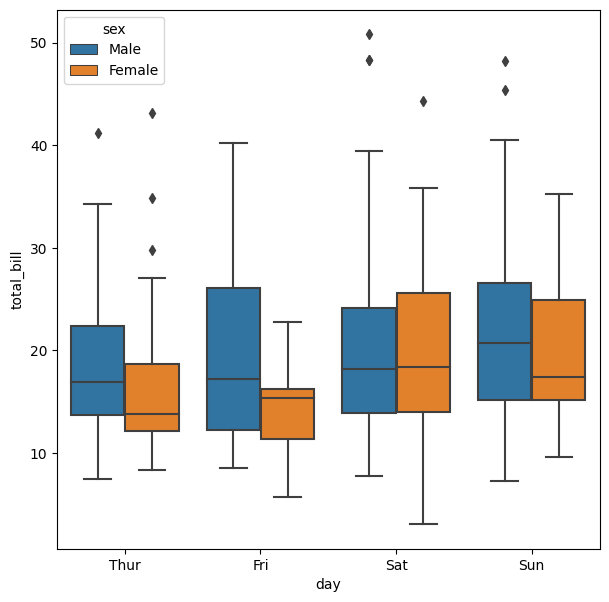

In [23]:
plt.figure(figsize=(7,7))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');

Y si deseo quitar los outliers, tal y como lo hacia en matplotlib, modifico el parametro *showfliers*

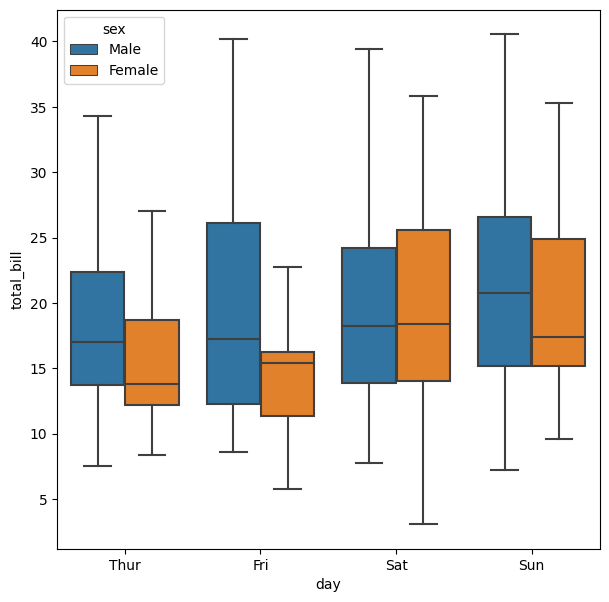

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True', showfliers=False);

Tambien puedo mapear sobre el mismo lienzo, el *boxplot* y el *swarmplot*

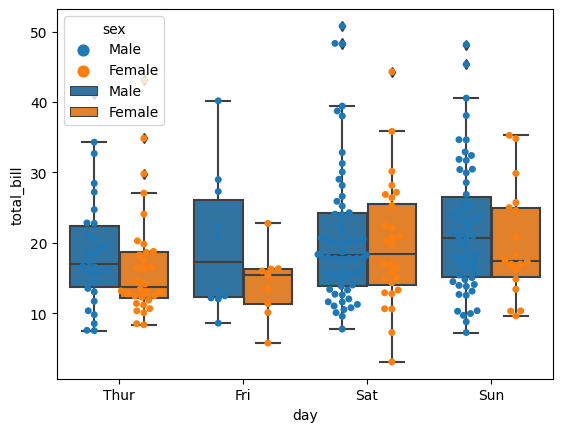

In [30]:
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');

A continuacion, cambiare el color del Swarmplot, y los circulitos por alguno otro marcador, con el parametro *marker*

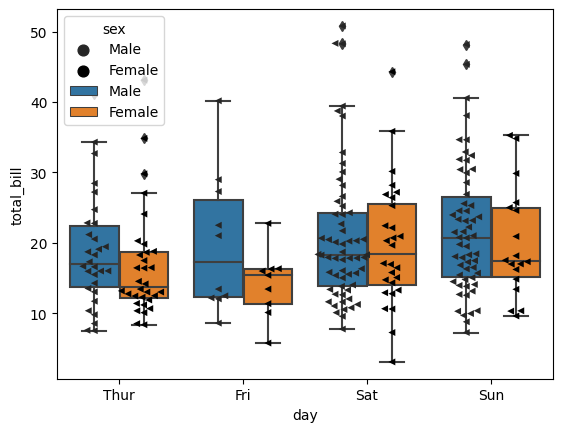

In [33]:
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True', color='0', marker='<');
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');

### ViolinPlot

Muy parecido al *boxplot*, solo que muestra de manera tan marcada ni el maximo, ni el minimo, ni el 25 o 75, sino mas bien ilustra como es que se estan concentrando los datos

-   split: False por defecto, ses usa para combinarlos

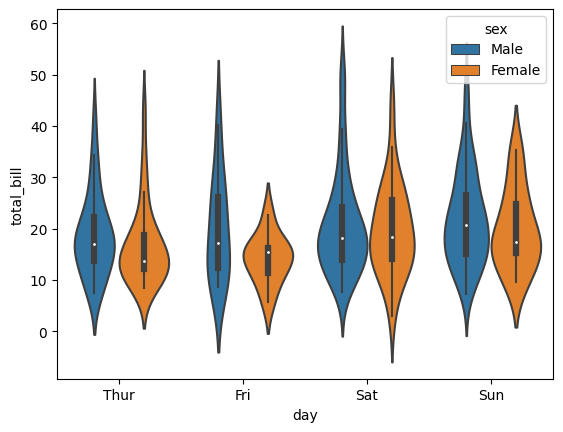

In [34]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', dodge='True');

Quitando el parametro dodge(creo es irrelevante para este tipo de grafico), y agregando una paleta de colores. 

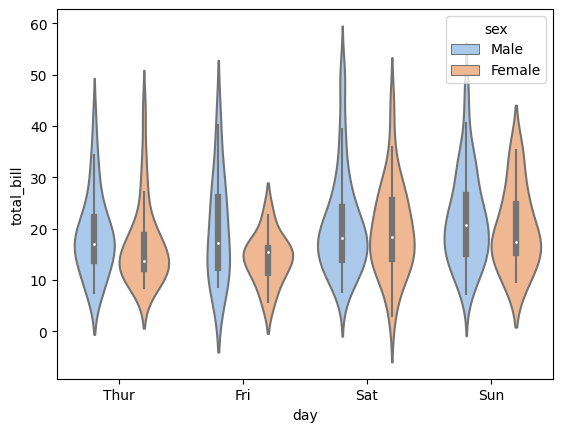

In [35]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', palette='pastel');

Agregando el parametro *split*

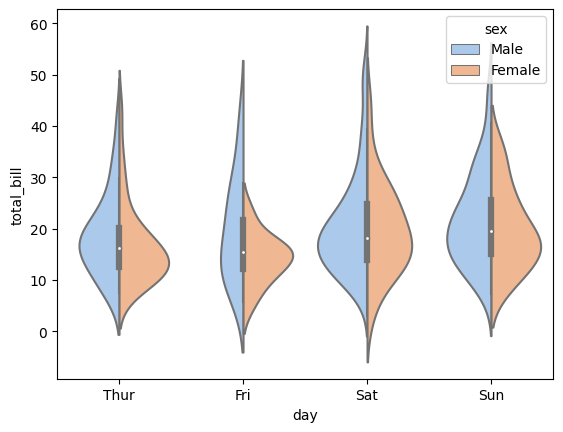

In [36]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', palette='pastel',split=True);

Me parece es muy util ese parametro *split*. 

ViolinPLot tambien se puede usar solo para variables netamente numericas

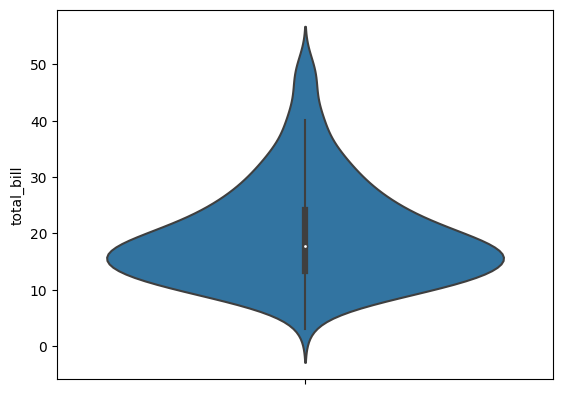

In [37]:
sns.violinplot(data=tips, y='total_bill');

### Catplot

Cat de categoricas

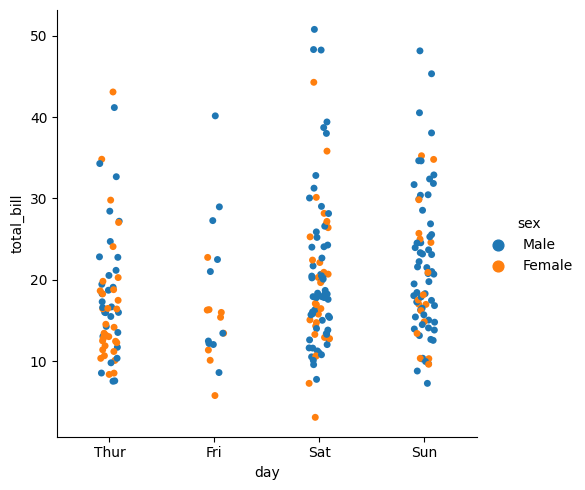

In [38]:
sns.catplot(data=tips,x='day', y='total_bill', hue='sex');

Lo que observamos con *catplot* es que muestra exactamente el grafico *stripplot*. Agregemos el parametro *dodge*

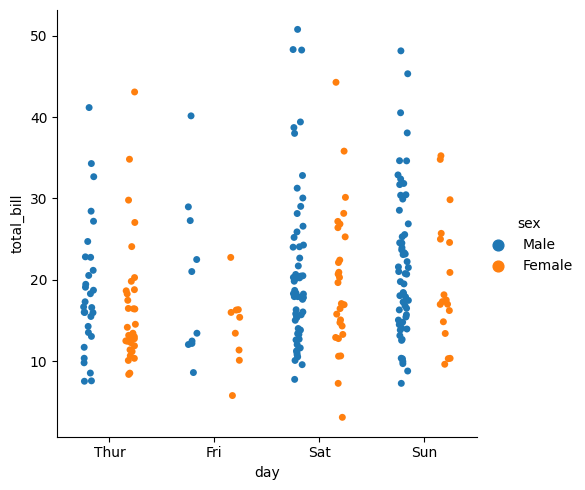

In [39]:
sns.catplot(data=tips,x='day', y='total_bill', hue='sex', dodge=True);

Lo interesante, es si agregamso un nuevo parametro que ya es familiar: kind, y le decimos el tipo de grafico queremos muestre:

- swarm
- box
- 

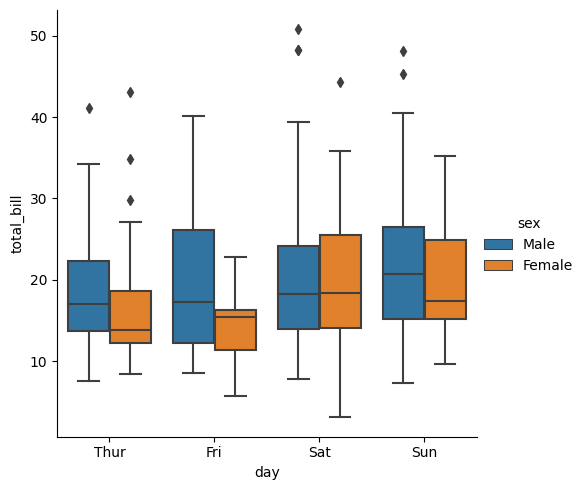

In [41]:
sns.catplot(data=tips,x='day', y='total_bill', hue='sex', dodge=True, kind='box');

PUedo incluso agregar otra variable, en este caso *time*, usando el parametro *col*

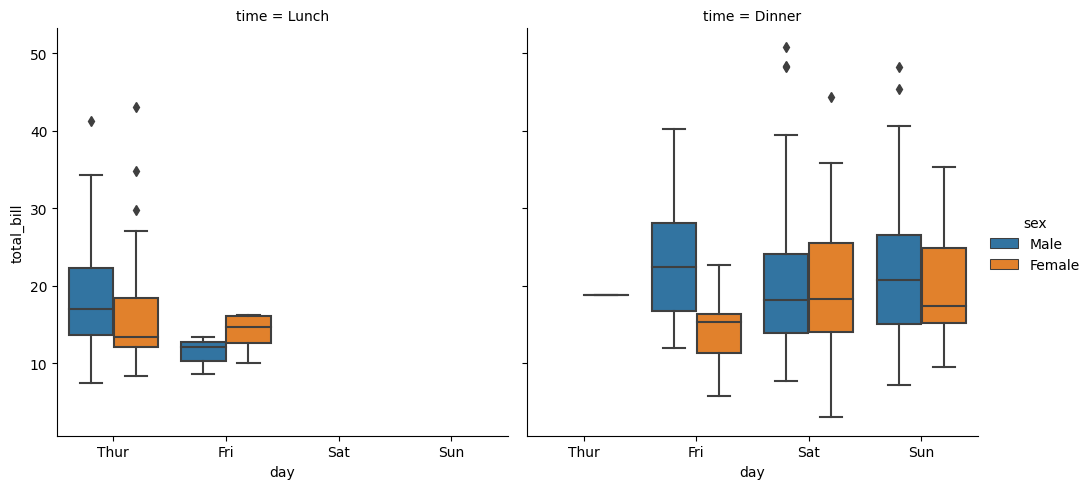

In [42]:
sns.catplot(data=tips,x='day', y='total_bill', hue='sex', dodge=True, kind='box', col='time' );

Tengo ahora un grafico del comportamiento del total de las cuentas segementado en Almuerzo o Cena, y a su vez por cada uno de los dias, y generos